In [1]:
import os
os.chdir('..')

from util import CONFIG
CONFIG.set_use_mpl_tables(True)

### Chapter 4 examples with Qiskit

In this notebook, we run the example circuits from chapter 4 using the Qiskit simulator backend `statevector_simulator`. You can learn more about this simulator in the __[Qiskit documentation](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.StatevectorSimulator.html)__.

These examples demonstrate how the design of our simulator makes it easy to transition from local experimentation to running on Qiskit backends/real computers.

We add the `run` function below to the Qiskit `QuantumCircuit` class to run circuits on the Qiskit statevector simulator.

In [2]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, transpile

def run(self):
    backend = qiskit.Aer.get_backend('statevector_simulator')
    circ = transpile(self, backend)
    job = backend.run(circ)
    state = job.result().get_statevector()
    return state

setattr(QuantumCircuit, 'run', run)

#### Section 4.5.2

Implementation of example circuit in figure 4.20:

In [3]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)

qc.h(q[0])
qc.h(q[1])
qc.mcx([q[0], q[1]], q[2])

state = qc.run()

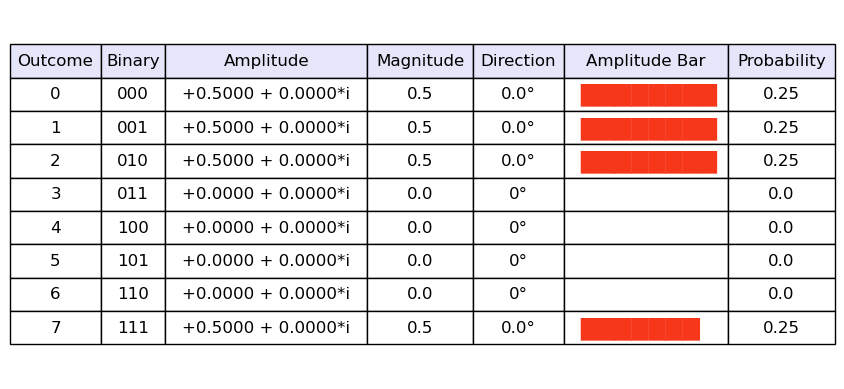

In [4]:
from util import show_state_table

show_state_table(state)

#### Section 4.5.3

Encoding the uniform distribution using three-qubits:

In [5]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)

for i in range(len(q)):
    qc.h(q[i])

state = qc.run()

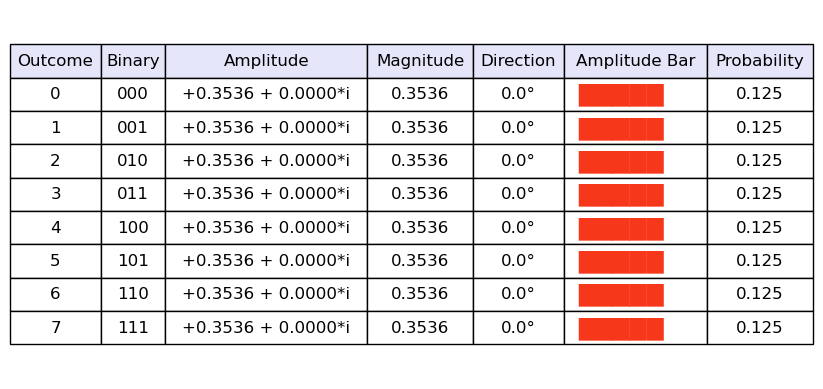

In [6]:
show_state_table(state)

#### Section 4.5.4

Encoding the binomial distribution:

In [7]:
from math import pi

q = QuantumRegister(3)
qc = QuantumCircuit(q)

for i in range(len(q)):
    qc.ry(pi/3, q[i])

state = qc.run()

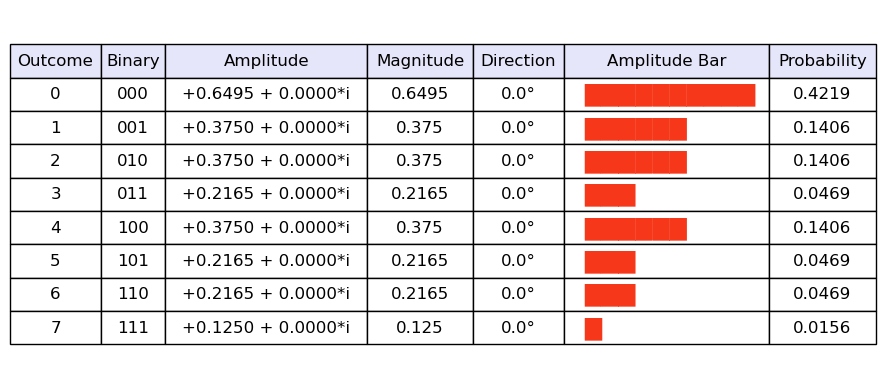

In [8]:
show_state_table(state)

#### Section 4.5.5

Implementing the Bell states:

In [9]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[0])
qc.cx(q[0], q[1])

state = qc.run()

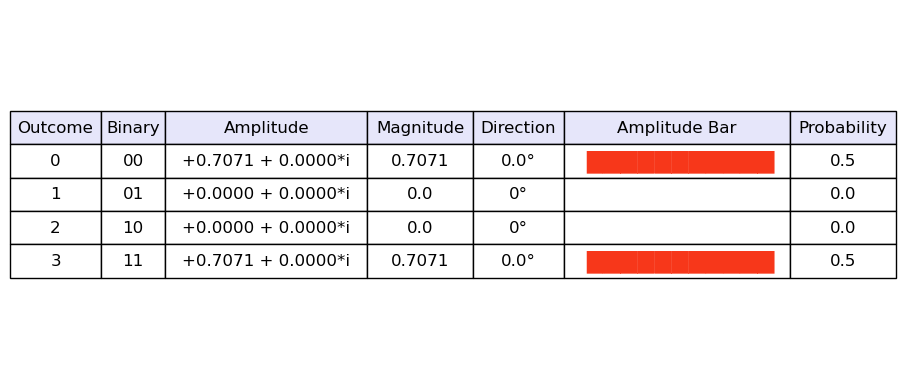

In [10]:
show_state_table(state)

In [11]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[0])
qc.x(q[1])
qc.cx(q[0], q[1])

state = qc.run()

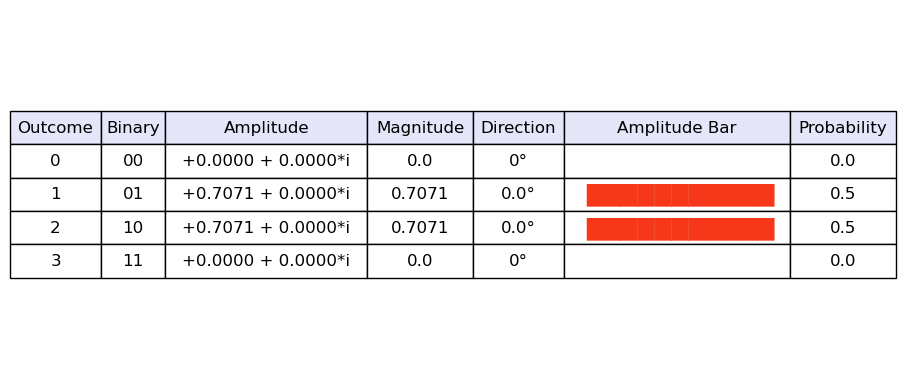

In [12]:
show_state_table(state)